<a href="https://colab.research.google.com/github/mateusduarte-max/Projetos_Python/blob/main/Cotacao_Ibov.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importar as bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web

# Corrigir bug na biblioteca Yahoo
!pip install yfinance --upgrade --no-cache-dir
import yfinance as yf
yf.pdr_override()

     |████████████████████████████████| 5.5MB 10.5MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.55-py2.py3-none-any.whl size=22616 sha256=4e16b915e59d01e2341ee6c18b423232cad84ed52cf2f23e70e5c035c1d3530f
  Stored in directory: /tmp/pip-ephem-wheel-cache-svtjzr6x/wheels/04/98/cc/2702a4242d60bdc14f48b4557c427ded1fe92aedf257d4565c
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


In [32]:
# Buscar os dados Ibovespa
ibov = web.get_data_yahoo('^ITSA4')


[*********************100%***********************]  1 of 1 completed

1 Failed download:
- ^ITSA4: No data found, symbol may be delisted


In [22]:
# Visualização dos dados
ibov.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


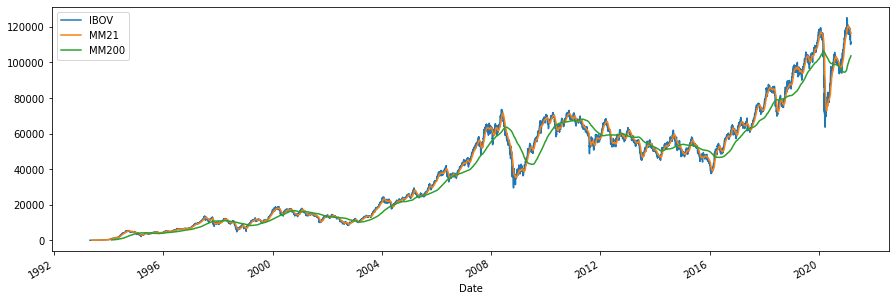

In [13]:
# Plotar os dados do Bovespa
ibov['Close'].plot(figsize=(15,5), label='IBOV')
ibov['Close'].rolling(21).mean().plot(label='MM21')
ibov['Close'].rolling(200).mean().plot(label='MM200')
plt.legend()

In [18]:
TickerA='ITSA4.SA'
TickerB='BBDC4.SA'
TickerC='CSMG3.SA'


prices=pd.DataFrame()
tickers = [TickerA, TickerB, TickerC]
for t in tickers:
    prices[t]=wb.DataReader(t, data_source='yahoo', start='2010-1-1')['Adj Close']

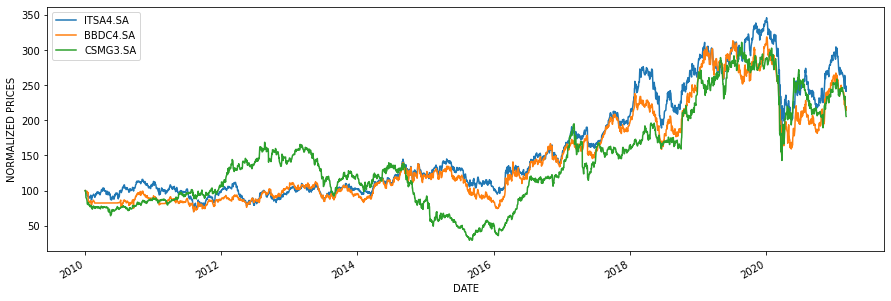

In [24]:
(prices/prices.iloc[0]*100).plot(figsize=(15,5))
plt.ylabel('NORMALIZED PRICES')
plt.xlabel('DATE')
plt.show()

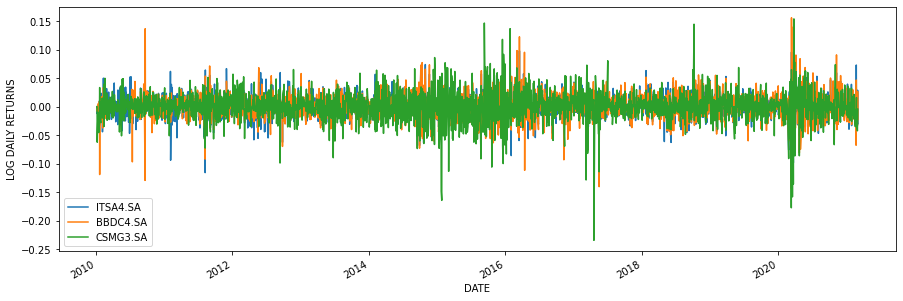

In [25]:
# Retorno diário
log_returns=np.log(prices/prices.shift(1))
log_returns.plot(figsize=(15,5))
plt.ylabel('LOG DAILY RETURNS')
plt.xlabel('DATE')
plt.show()

In [26]:
# Retorno médio diário
log_returns.mean()

ITSA4.SA    0.000319
BBDC4.SA    0.000277
CSMG3.SA    0.000261
dtype: float64

In [27]:
# Retorno médio anual
log_returns.mean()*250

ITSA4.SA    0.079820
BBDC4.SA    0.069165
CSMG3.SA    0.065196
dtype: float64